<a href="https://colab.research.google.com/github/esencialdata/DataAnalisysBigData_BLOQUE/blob/main/copia_de_population_regions_with_projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Más de 8 de cada 10 personas en el mundo vivirán en Asia o África para el año 2100**


## Se espera que la mayor parte del crecimiento de la población mundial durante el próximo siglo venga de África.



Las Naciones Unidas proyectan que el crecimiento de la población mundial se ralentizará significativamente en el transcurso del siglo XXI, alcanzando los 10.400 millones en la déada de 2080 antes de disminuir lentamente. Pero, ¿cómo se distribuye este crecimiento en todo el mundo? ¿Cómo se ve el mundo en 2100 en comparación con hoy?

En este gráfico vemos la población mundial dividida por región. Esto muestra datos históricos, pero también proyecciones hasta 2100 basadas en el escenario de crecimiento medio de la ONU.



El cambio sorprendente entre ahora y 2100 es el crecimiento esperado de la población africana. En 2023, su población es de alrededor de 1.400 millones; para 2100 se proyecta que alcance poco menos de 4 mil millones.

En los últimos 50 años, Asia experimentó un rápido crecimiento de la población. En 2023, su población es de alrededor de 4.800 millones. Para 2050 se espera que aumente a 5.300 millones, pero luego caiga en la segunda mitad del siglo. Puede leer más sobre la fuerza impulsora detrás de estos cambios demográficos aquí. Para el año 2100, se prevé que la población de Asia vuelva a caer casi a los niveles que vemos hoy.

Puede usar el interruptor "relativo" en el gráfico para ver la participación de cada región en la población mundial. En 2023, África es el hogar de alrededor del 18 % de la población mundial; para el año 2100 se proyecta que esto aumente al 38 %. Asia verá una caída significativa de casi el 60% hoy a alrededor del 45% en 2100.

A finales de siglo, más de 8 de cada 10 personas del mundo vivirán en Asia o África.

Se prevé que América del Norte, Central y del Sur, y Oceanía, también verán un aumento de la población este siglo, pero este crecimiento será mucho más modesto en relación con el crecimiento en África. Europa es la única región donde se espera que la población disminuya.

Estos cambios traerán nuevas oportunidades y desafíos. Por ejemplo, se espera que la pobreza extrema se concentre cada vez más en África en las décadas siguientes. Esto representará un cambio importante con el siglo anterior.

In [ ]:
import pandas as pd

# Cargar la base de datos
df = pd.read_csv('population-regions-with-projections.csv')

# Mostrar las primeras filas para entender la estructura de los datos
print(df.head())

# Verificar si hay valores nulos
print(df.isnull().sum())

# Filtrar los datos para años de interés (a partir de 2023)
df_filtered = df[df['Year'] >= 2023]


        Entity Code   Year  Population
0  Afghanistan  AFG -10000       14737
1  Afghanistan  AFG  -9000       20405
2  Afghanistan  AFG  -8000       28253
3  Afghanistan  AFG  -7000       39120
4  Afghanistan  AFG  -6000       54166
Entity           0
Code          5197
Year             0
Population       0
dtype: int64


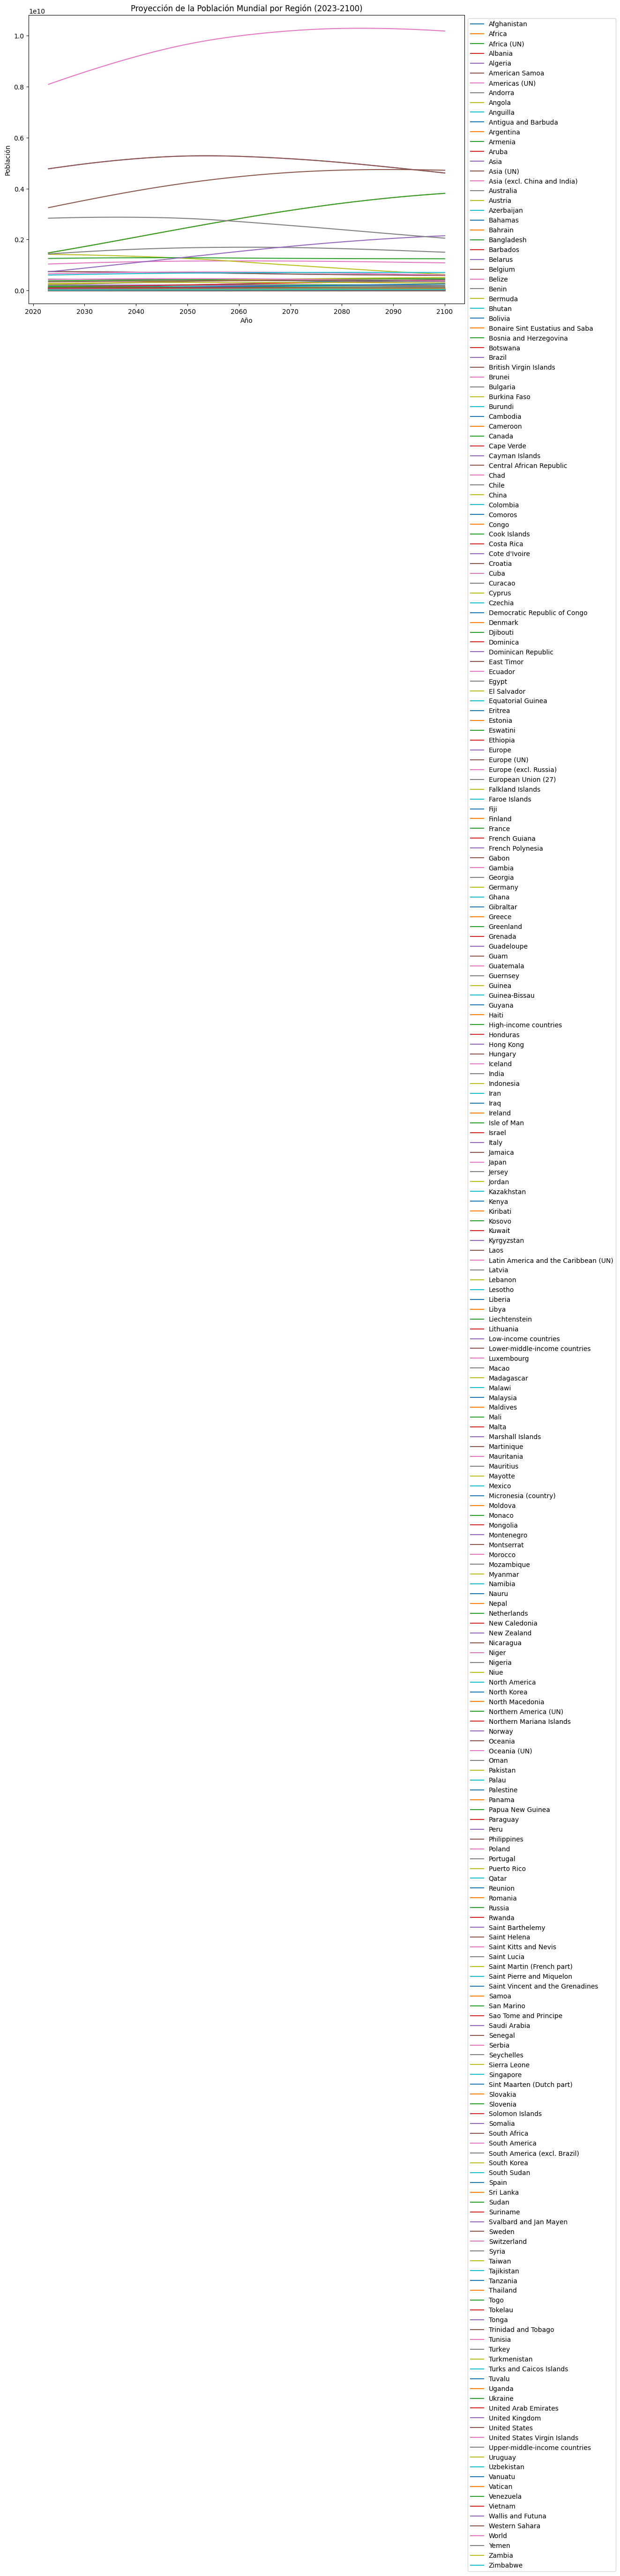

In [ ]:
import matplotlib.pyplot as plt

# Graficar la evolución de la población por región a lo largo del tiempo
regions = df_filtered['Entity'].unique()

plt.figure(figsize=(12, 8))
for region in regions:
    region_data = df_filtered[df_filtered['Entity'] == region]
    plt.plot(region_data['Year'], region_data['Population'], label=region)

plt.xlabel('Año')
plt.ylabel('Población')
plt.title('Proyección de la Población Mundial por Región (2023-2100)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # Colocar la leyenda fuera del gráfico
plt.show()


<ipython-input-5-e14b826dbe69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['World_Population'] = df_filtered.groupby('Year')['Population'].transform('sum')
<ipython-input-5-e14b826dbe69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Relative_Population'] = df_filtered['Population'] / df_filtered['World_Population']


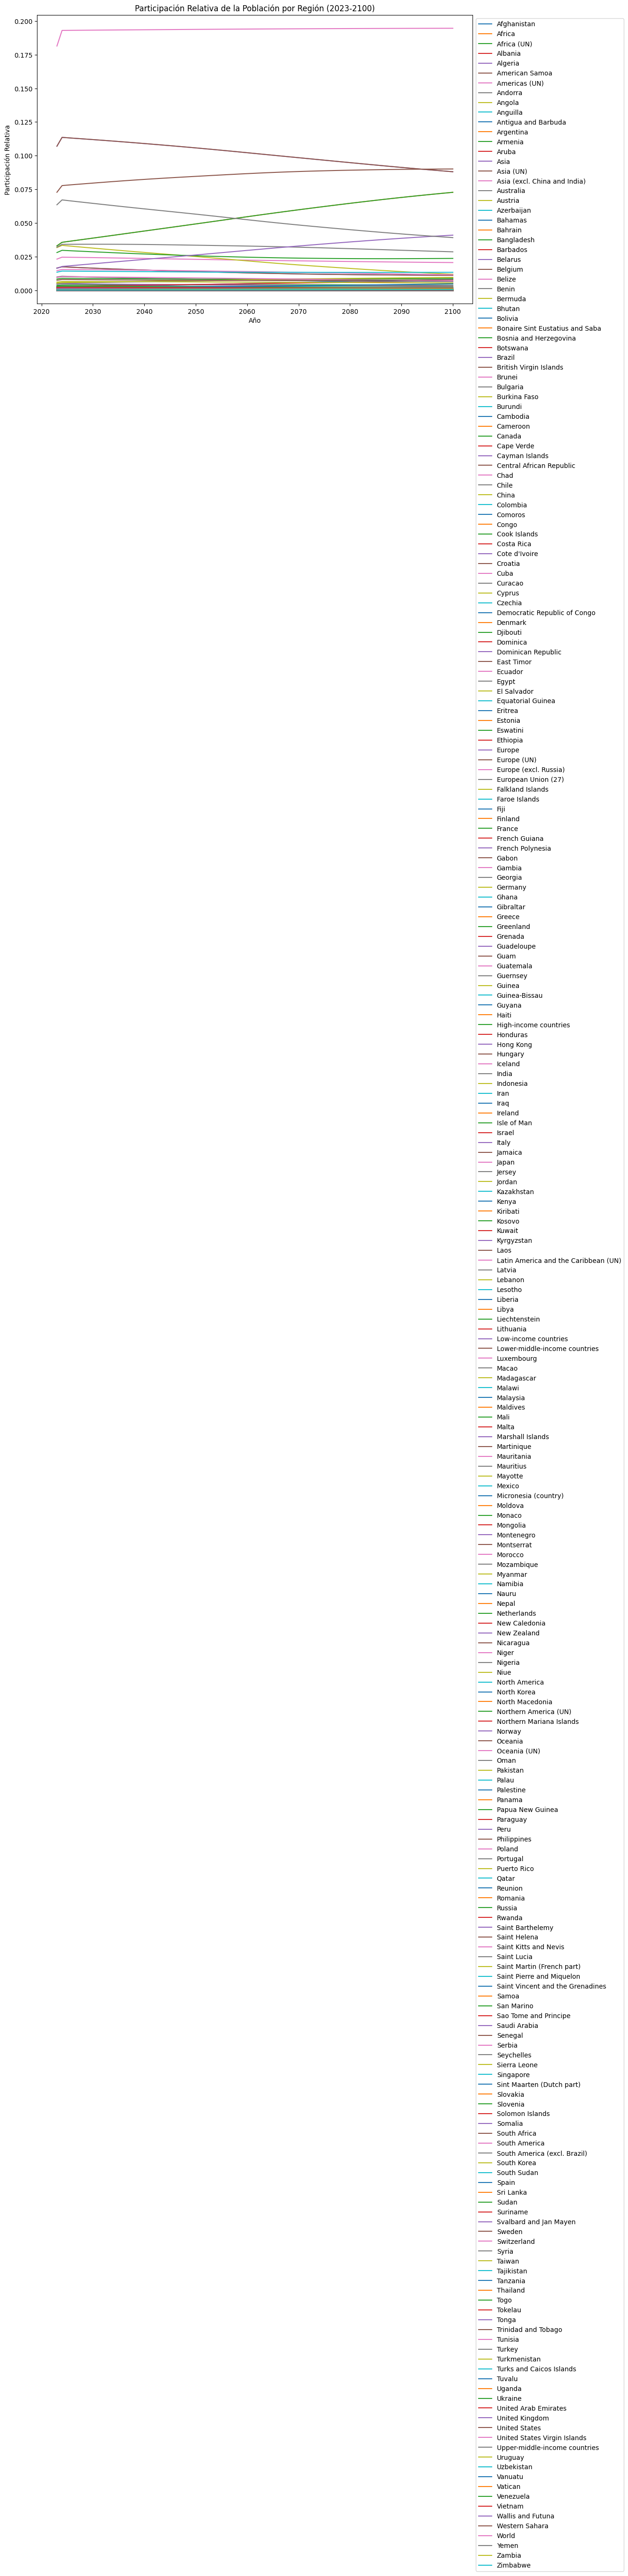

In [ ]:
# Calcular la participación de cada región en la población mundial
df_filtered['World_Population'] = df_filtered.groupby('Year')['Population'].transform('sum')
df_filtered['Relative_Population'] = df_filtered['Population'] / df_filtered['World_Population']

# Graficar la participación relativa
plt.figure(figsize=(12, 8))
for region in regions:
    region_data = df_filtered[df_filtered['Entity'] == region]
    plt.plot(region_data['Year'], region_data['Relative_Population'], label=region)

plt.xlabel('Año')
plt.ylabel('Participación Relativa')
plt.title('Participación Relativa de la Población por Región (2023-2100)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


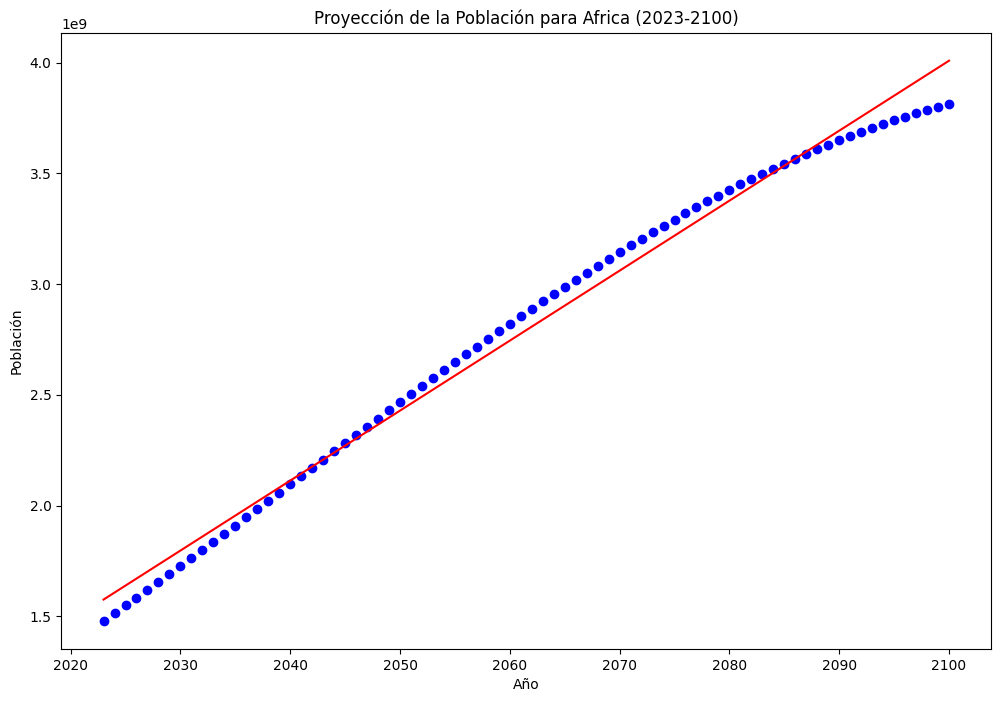

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Seleccionar datos para un solo país como ejemplo
region_example = 'Africa'  # Cambia esto según la región que quieras analizar
region_data = df_filtered[df_filtered['Entity'] == region_example]

# Preparar los datos para el modelo de regresión
X = region_data['Year'].values.reshape(-1, 1)
y = region_data['Population'].values

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(X, y)

# Hacer predicciones para el futuro (por ejemplo, hasta 2100)
future_years = np.array(range(2023, 2101)).reshape(-1, 1)
predictions = model.predict(future_years)

# Graficar las proyecciones
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue')
plt.plot(future_years, predictions, color='red')
plt.xlabel('Año')
plt.ylabel('Población')
plt.title(f'Proyección de la Población para {region_example} (2023-2100)')
plt.show()


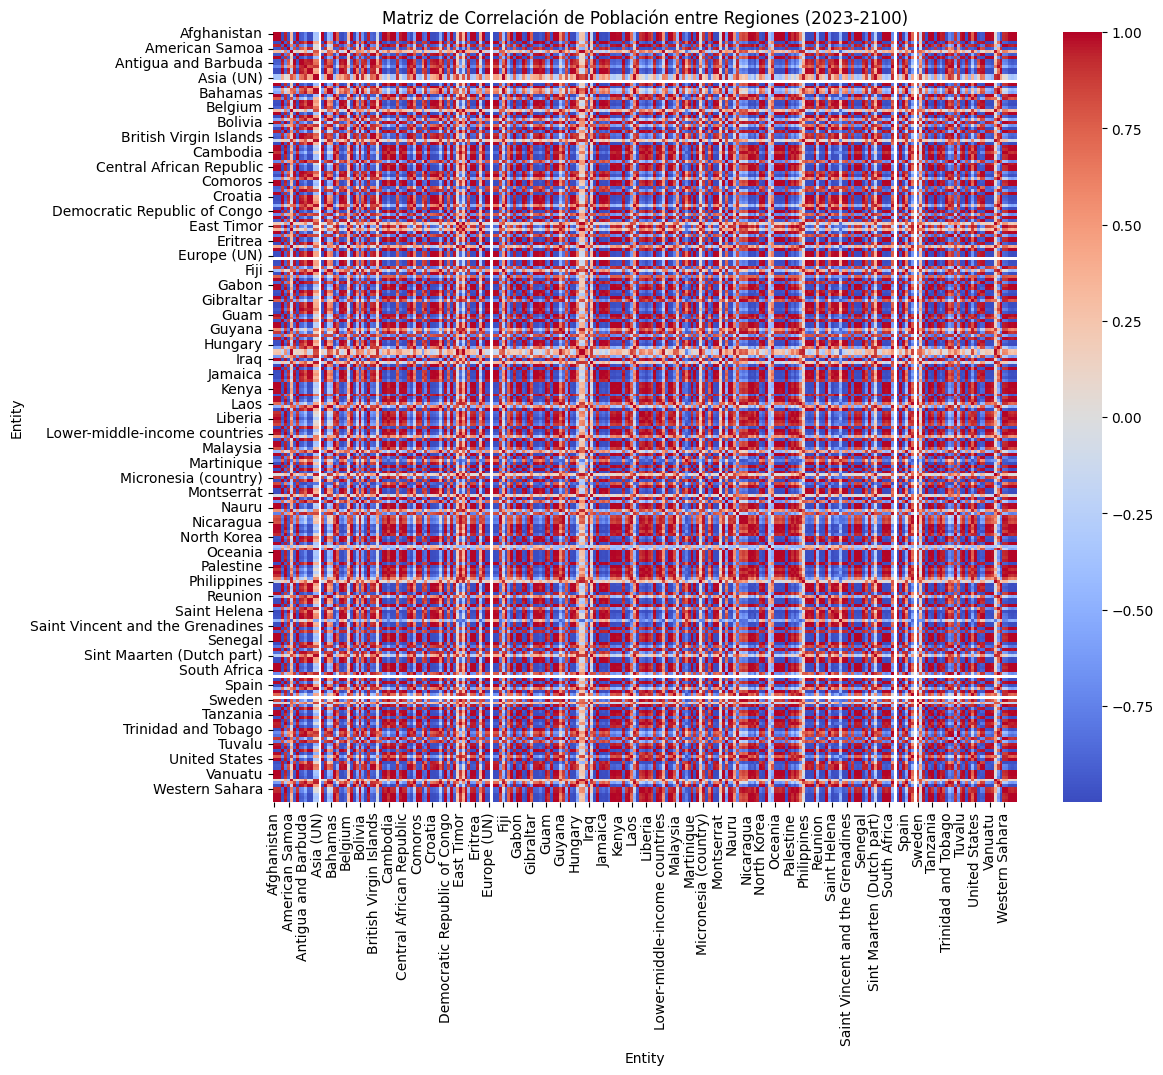

In [ ]:
import seaborn as sns

# Crear una matriz de correlación para las regiones
correlation_matrix = df_filtered.pivot(index='Year', columns='Entity', values='Population').corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Población entre Regiones (2023-2100)')
plt.show()
